Distance Results (sorted by Euclidean):
   weight  sweetness   fruit  euclidean  manhattan  minkowski
3     170          5  Orange      5.025        5.5      5.002
4     160          6   Apple      5.025        5.5      5.002
0     180          7   Apple     15.075       16.5     15.005
2     150          4  Orange     15.075       16.5     15.005
5     140          3  Orange     25.125       27.5     25.008
1     200          6   Apple     35.004       35.5     35.000

K=3 Nearest Neighbors Prediction: Apple


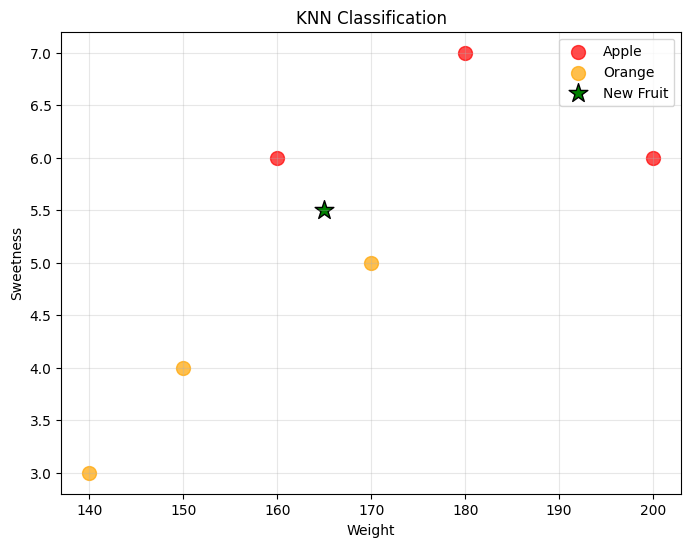

In [1]:
# KNN 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'weight': [180, 200, 150, 170, 160, 140],
    'sweetness': [7, 6, 4, 5, 6, 3],
    'fruit': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
})

new_fruit = np.array([165, 5.5])
k = 3

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

def minkowski_distance(p1, p2, p=3):
    return np.sum(np.abs(p1 - p2) ** p) ** (1/p)

# Extract features as numpy array
features = data[['weight', 'sweetness']].values
labels = data['fruit'].values

# Calculate distances using vectorized operations
euclidean_distances = np.sqrt(np.sum((features - new_fruit) ** 2, axis=1))
manhattan_distances = np.sum(np.abs(features - new_fruit), axis=1)
minkowski_distances = np.sum(np.abs(features - new_fruit) ** 3, axis=1) ** (1/3)

# Create results DataFrame
results = pd.DataFrame({
    'weight': features[:, 0],
    'sweetness': features[:, 1],
    'fruit': labels,
    'euclidean': euclidean_distances,
    'manhattan': manhattan_distances,
    'minkowski': minkowski_distances
})

# Sort by euclidean distance
results_sorted = results.sort_values('euclidean')
print("Distance Results (sorted by Euclidean):")
print(results_sorted.round(3))

# Get k nearest neighbors
k_nearest = results_sorted.head(k)
prediction = k_nearest['fruit'].mode()[0]
print(f"\nK={k} Nearest Neighbors Prediction: {prediction}")

# Visualization
plt.figure(figsize=(8, 6))
colors = {'Apple': 'red', 'Orange': 'orange'}
for fruit in data['fruit'].unique():
    fruit_data = data[data['fruit'] == fruit]
    plt.scatter(fruit_data['weight'], fruit_data['sweetness'], 
               c=colors[fruit], label=fruit, alpha=0.7, s=100)

plt.scatter(new_fruit[0], new_fruit[1], c='green', marker='*', 
           s=200, label='New Fruit', edgecolor='black')

plt.xlabel('Weight')
plt.ylabel('Sweetness')
plt.title('KNN Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [2]:
# ID3 Decision Tree Implementation
import math
from collections import Counter

def calculate_entropy(data):
    labels = [row[-1] for row in data]
    label_counts = Counter(labels)
    print(f"Label distribution: {label_counts}")
    total_samples = len(data)
    entropy = 0
    for count in label_counts.values():
        probability = count / total_samples
        entropy -= probability * math.log2(probability)
    return entropy

def calculate_information_gain(data, feature_index):
    total_entropy = calculate_entropy(data)
    unique_values = set(row[feature_index] for row in data)
    weighted_entropy = 0
    for value in unique_values:
        subset = [row for row in data if row[feature_index] == value]
        weight = len(subset) / len(data)
        subset_entropy = calculate_entropy(subset)
        weighted_entropy += weight * subset_entropy
    return total_entropy - weighted_entropy

def find_best_feature(data):
    num_features = len(data[0]) - 1
    information_gains = []
    for i in range(num_features):
        gain = calculate_information_gain(data, i)
        information_gains.append(gain)
    best_feature_index = information_gains.index(max(information_gains))
    return best_feature_index

def build_decision_tree(data, feature_names):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]
    if len(feature_names) == 0:
        return Counter(labels).most_common(1)[0][0]
    best_feature_index = find_best_feature(data)
    best_feature_name = feature_names[best_feature_index]
    tree = {best_feature_name: {}}
    unique_values = set(row[best_feature_index] for row in data)
    for value in unique_values:
        subset = [row[:best_feature_index] + row[best_feature_index+1:] 
                 for row in data if row[best_feature_index] == value]
        remaining_features = (feature_names[:best_feature_index] + 
                            feature_names[best_feature_index+1:])
        subtree = build_decision_tree(subset, remaining_features)
        tree[best_feature_name][value] = subtree
    return tree

def predict_sample(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    feature_value = sample.get(feature)
    if feature_value in tree[feature]:
        subtree = tree[feature][feature_value]
        return predict_sample(subtree, sample)
    else:
        return "Unknown"

if __name__ == "__main__":
    sample_data = [
        ['sunny', 'hot', 'high', 'false', 'no'],
        ['sunny', 'hot', 'high', 'true', 'no'],
        ['overcast', 'hot', 'high', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'true', 'no'],
        ['overcast', 'cool', 'normal', 'true', 'yes'],
        ['sunny', 'mild', 'high', 'false', 'no'],
        ['sunny', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'normal', 'false', 'yes'],
        ['sunny', 'mild', 'normal', 'true', 'yes'],
        ['overcast', 'mild', 'high', 'true', 'yes'],
        ['overcast', 'hot', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'true', 'no']
    ]
    feature_names = ['outlook', 'temperature', 'humidity', 'windy']
    print("Building decision tree...")
    tree = build_decision_tree(sample_data, feature_names)
    print("\nDecision Tree:")
    print(tree)
    test_sample = {'outlook': 'sunny', 'temperature': 'mild', 'humidity': 'normal', 'windy': 'false'}
    prediction = predict_sample(tree, test_sample)
    print(f"\nPrediction for {test_sample}: {prediction}")

Building decision tree...
Label distribution: Counter({'yes': 9, 'no': 5})
Label distribution: Counter({'yes': 3, 'no': 2})
Label distribution: Counter({'yes': 4})
Label distribution: Counter({'no': 3, 'yes': 2})
Label distribution: Counter({'yes': 9, 'no': 5})
Label distribution: Counter({'yes': 3, 'no': 1})
Label distribution: Counter({'no': 2, 'yes': 2})
Label distribution: Counter({'yes': 4, 'no': 2})
Label distribution: Counter({'yes': 9, 'no': 5})
Label distribution: Counter({'yes': 6, 'no': 1})
Label distribution: Counter({'no': 4, 'yes': 3})
Label distribution: Counter({'yes': 9, 'no': 5})
Label distribution: Counter({'yes': 6, 'no': 2})
Label distribution: Counter({'no': 3, 'yes': 3})
Label distribution: Counter({'yes': 3, 'no': 2})
Label distribution: Counter({'yes': 1, 'no': 1})
Label distribution: Counter({'yes': 2, 'no': 1})
Label distribution: Counter({'yes': 3, 'no': 2})
Label distribution: Counter({'yes': 2, 'no': 1})
Label distribution: Counter({'yes': 1, 'no': 1})
Lab

In [3]:
# CART (Classification and Regression Trees)
import math
from collections import Counter

def gini_impurity(data):
    labels = [row[-1] for row in data]
    label_counts = Counter(labels)
    total_samples = len(data)
    gini = 1.0
    for count in label_counts.values():
        probability = count / total_samples
        gini -= probability ** 2
    return gini

def gini_gain(data, feature_index):
    total_gini = gini_impurity(data)
    unique_values = set(row[feature_index] for row in data)
    weighted_gini = 0
    for value in unique_values:
        subset = [row for row in data if row[feature_index] == value]
        weight = len(subset) / len(data)
        weighted_gini += weight * gini_impurity(subset)
    return total_gini - weighted_gini

def find_best_feature_cart(data):
    num_features = len(data[0]) - 1
    gini_gains = []
    for i in range(num_features):
        gain = gini_gain(data, i)
        gini_gains.append(gain)
    best_feature_index = gini_gains.index(max(gini_gains))
    return best_feature_index

def build_cart_tree(data, feature_names, max_depth=None, min_samples=1, depth=0):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]
    if len(feature_names) == 0 or len(data) < min_samples:
        return Counter(labels).most_common(1)[0][0]
    if max_depth is not None and depth >= max_depth:
        return Counter(labels).most_common(1)[0][0]
    
    best_feature_index = find_best_feature_cart(data)
    best_feature_name = feature_names[best_feature_index]
    tree = {best_feature_name: {}}
    unique_values = set(row[best_feature_index] for row in data)
    
    for value in unique_values:
        subset = [row[:best_feature_index] + row[best_feature_index+1:] 
                 for row in data if row[best_feature_index] == value]
        remaining_features = (feature_names[:best_feature_index] + 
                            feature_names[best_feature_index+1:])
        subtree = build_cart_tree(subset, remaining_features, max_depth, min_samples, depth+1)
        tree[best_feature_name][value] = subtree
    return tree

def predict_cart(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    feature_value = sample.get(feature)
    if feature_value in tree[feature]:
        subtree = tree[feature][feature_value]
        return predict_cart(subtree, sample)
    else:
        return "Unknown"

if __name__ == "__main__":
    sample_data = [
        ['sunny', 'hot', 'high', 'false', 'no'],
        ['sunny', 'hot', 'high', 'true', 'no'],
        ['overcast', 'hot', 'high', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'true', 'no'],
        ['overcast', 'cool', 'normal', 'true', 'yes'],
        ['sunny', 'mild', 'high', 'false', 'no'],
        ['sunny', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'normal', 'false', 'yes'],
        ['sunny', 'mild', 'normal', 'true', 'yes'],
        ['overcast', 'mild', 'high', 'true', 'yes'],
        ['overcast', 'hot', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'true', 'no']
    ]
    feature_names = ['outlook', 'temperature', 'humidity', 'windy']
    print("Building CART tree...")
    cart_tree = build_cart_tree(sample_data, feature_names, max_depth=3, min_samples=2)
    print("\nCART Tree:")
    print(cart_tree)
    test_sample = {'outlook': 'sunny', 'temperature': 'mild', 'humidity': 'normal', 'windy': 'false'}
    prediction = predict_cart(cart_tree, test_sample)
    print(f"\nCART Prediction for {test_sample}: {prediction}")

Building CART tree...

CART Tree:
{'outlook': {'rainy': {'windy': {'false': 'yes', 'true': 'no'}}, 'overcast': 'yes', 'sunny': {'humidity': {'normal': 'yes', 'high': 'no'}}}}

CART Prediction for {'outlook': 'sunny', 'temperature': 'mild', 'humidity': 'normal', 'windy': 'false'}: yes


In [4]:
# C4.5 Decision Tree Algorithm
import math
from collections import Counter

def calculate_entropy_c45(data):
    labels = [row[-1] for row in data]
    label_counts = Counter(labels)
    total_samples = len(data)
    entropy = 0
    for count in label_counts.values():
        probability = count / total_samples
        entropy -= probability * math.log2(probability)
    return entropy

def gain_ratio(data, feature_index):
    total_entropy = calculate_entropy_c45(data)
    unique_values = set(row[feature_index] for row in data)
    weighted_entropy = 0
    split_info = 0
    
    for value in unique_values:
        subset = [row for row in data if row[feature_index] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * calculate_entropy_c45(subset)
        if weight > 0:
            split_info -= weight * math.log2(weight)
    
    info_gain = total_entropy - weighted_entropy
    if split_info == 0:
        return 0
    return info_gain / split_info

def find_best_feature_c45(data):
    num_features = len(data[0]) - 1
    gain_ratios = []
    for i in range(num_features):
        ratio = gain_ratio(data, i)
        gain_ratios.append(ratio)
    best_feature_index = gain_ratios.index(max(gain_ratios))
    return best_feature_index

def build_c45_tree(data, feature_names, threshold=0.01):
    labels = [row[-1] for row in data]
    if labels.count(labels[0]) == len(labels):
        return labels[0]
    if len(feature_names) == 0:
        return Counter(labels).most_common(1)[0][0]
    
    best_feature_index = find_best_feature_c45(data)
    best_gain_ratio = gain_ratio(data, best_feature_index)
    
    if best_gain_ratio < threshold:
        return Counter(labels).most_common(1)[0][0]
    
    best_feature_name = feature_names[best_feature_index]
    tree = {best_feature_name: {}}
    unique_values = set(row[best_feature_index] for row in data)
    
    for value in unique_values:
        subset = [row[:best_feature_index] + row[best_feature_index+1:] 
                 for row in data if row[best_feature_index] == value]
        remaining_features = (feature_names[:best_feature_index] + 
                            feature_names[best_feature_index+1:])
        subtree = build_c45_tree(subset, remaining_features, threshold)
        tree[best_feature_name][value] = subtree
    return tree

def predict_c45(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    feature_value = sample.get(feature)
    if feature_value in tree[feature]:
        subtree = tree[feature][feature_value]
        return predict_c45(subtree, sample)
    else:
        return "Unknown"

def prune_tree(tree, validation_data, feature_names):
    if not isinstance(tree, dict):
        return tree
    
    feature = next(iter(tree))
    feature_index = feature_names.index(feature)
    
    for value in tree[feature]:
        if isinstance(tree[feature][value], dict):
            subset = [row for row in validation_data if row[feature_index] == value]
            if subset:
                remaining_features = [f for f in feature_names if f != feature]
                tree[feature][value] = prune_tree(tree[feature][value], subset, remaining_features)
    
    return tree

if __name__ == "__main__":
    sample_data = [
        ['sunny', 'hot', 'high', 'false', 'no'],
        ['sunny', 'hot', 'high', 'true', 'no'],
        ['overcast', 'hot', 'high', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'true', 'no'],
        ['overcast', 'cool', 'normal', 'true', 'yes'],
        ['sunny', 'mild', 'high', 'false', 'no'],
        ['sunny', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'normal', 'false', 'yes'],
        ['sunny', 'mild', 'normal', 'true', 'yes'],
        ['overcast', 'mild', 'high', 'true', 'yes'],
        ['overcast', 'hot', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'true', 'no']
    ]
    feature_names = ['outlook', 'temperature', 'humidity', 'windy']
    print("Building C4.5 tree...")
    c45_tree = build_c45_tree(sample_data, feature_names, threshold=0.01)
    print("\nC4.5 Tree:")
    print(c45_tree)
    test_sample = {'outlook': 'sunny', 'temperature': 'mild', 'humidity': 'normal', 'windy': 'false'}
    prediction = predict_c45(c45_tree, test_sample)
    print(f"\nC4.5 Prediction for {test_sample}: {prediction}")

Building C4.5 tree...

C4.5 Tree:
{'outlook': {'rainy': {'windy': {'false': 'yes', 'true': 'no'}}, 'overcast': 'yes', 'sunny': {'humidity': {'normal': 'yes', 'high': 'no'}}}}

C4.5 Prediction for {'outlook': 'sunny', 'temperature': 'mild', 'humidity': 'normal', 'windy': 'false'}: yes


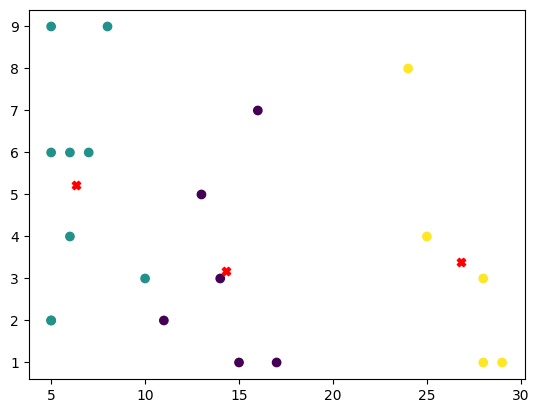

In [5]:
# KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euc_d(a, b):
  return np.sqrt(np.sum((a-b)**2))

def man_d(a, b):
  return np.sum(np.abs(a-b))

def mink_d(a, b, p=3):
  return np.sum(np.abs(a-b) ** p) ** (1/p)

def kmeans(data, k, distance_func, max_iters=100):
  centroids = data[np.random.choice(len(data), k, replace=False)]
  for _ in range(max_iters):
    clusters = []
    for x in data:
      dists = [distance_func(x, c) for c in centroids]
      clusters.append(np.argmin(dists))
    clusters = np.array(clusters)
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    if np.allclose(centroids, new_centroids):
      break
    centroids = new_centroids
  
  sse = 0
  for i in range(len(data)):
    sse += distance_func(data[i], centroids[clusters[i]]) ** 2
  return clusters, centroids, sse

df = pd.DataFrame({
  'Points': np.random.randint(5, 30, 20),
  'Assists': np.random.randint(1, 10, 20),
  'Rebounds': np.random.randint(2, 15, 20)
})
data = df[['Points', 'Assists', 'Rebounds']].values
clusters, centroids, sse = kmeans(data, k=3, distance_func=euc_d)
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# -------------------------------------
# Step 1: Create the Dataset
# -------------------------------------
points = np.array([
    [1, 1],
    [2, 1],
    [4, 3],
    [5, 4]
])

labels = ['P1', 'P2', 'P3', 'P4']

# -------------------------------------
# Step 2: Plot Scatter
# -------------------------------------
plt.scatter(points[:,0], points[:,1], color='blue')
for i, txt in enumerate(labels):
    plt.text(points[i,0]+0.05, points[i,1]+0.05, txt)
plt.title("Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# -------------------------------------
# Step 3: Distance Matrices
# -------------------------------------
def show_distance_matrix(points, metric):
    dist = squareform(pdist(points, metric=metric))
    df = pd.DataFrame(dist, index=labels, columns=labels)
    print(f"\nProximity Matrix ({metric.title()} Distance):\n", df.round(2))

show_distance_matrix(points, 'euclidean')
show_distance_matrix(points, 'cityblock')  # Manhattan
show_distance_matrix(points, 'minkowski')  # Default p=2 same as Euclidean

# -------------------------------------
# Step 4: Dendrograms for Linkages
# -------------------------------------
methods = ['single', 'complete', 'average']

for method in methods:
    Z = linkage(points, method=method, metric='euclidean')
    plt.figure()
    dendrogram(Z, labels=labels)
    plt.title(f"Hierarchical Clustering ({method.title()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()


In [ ]:
https://gemini.google.com/share/12300ffc0b0c